In [102]:
import pandas as pd
import os
import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import plotly.tools as tls
import json
import seaborn as sns

import folium
from folium import plugins
from folium.plugins import HeatMap

In [103]:
df_a = pd.read_csv('accidents_2017.csv')

In [104]:
df_a.head(35)

Id District Name           Neighborhood Name  \
0   2017S008429           Unknown                     Unknown   
1   2017S007316           Unknown                     Unknown   
2   2017S010210           Unknown                     Unknown   
3   2017S006364           Unknown                     Unknown   
4   2017S004615        Sant Martí  el Camp de l'Arpa del Clot   
5   2017S007775        Sant Martí  el Camp de l'Arpa del Clot   
6   2017S004484        Sant Martí  el Camp de l'Arpa del Clot   
7   2017S010680        Sant Martí  el Camp de l'Arpa del Clot   
8   2017S005152        Sant Martí  el Camp de l'Arpa del Clot   
9   2017S003932        Sant Martí  el Camp de l'Arpa del Clot   
10  2017S010348        Sant Martí  el Camp de l'Arpa del Clot   
11  2017S000245        Sant Martí  el Camp de l'Arpa del Clot   
12  2017S005695        Sant Martí  el Camp de l'Arpa del Clot   
13  2017S007384        Sant Martí  el Camp de l'Arpa del Clot   
14  2017S008080        Sant Martí  el Camp de l'Arpa del Clot   
15  2017S003439        Sant Martí  el Camp de l'Arpa del Clot   
16  2017S002410        Sant Martí  el Camp de l'Arpa del Clot   
17  2017S009296        Sant Martí  el Camp de l'Arpa del Clot   
18  2017S010102        Sant Martí  el Camp de l'Arpa del Clot   
19  2017S002158        Sant Martí  el Camp de l'Arpa del Clot   
20  2017S007606        Sant Martí  el Camp de l'Arpa del Clot   
21  2017S007805        Sant Martí  el Camp de l'Arpa del Clot   
22  2017S008987        Sant Martí  el Camp de l'Arpa del Clot   
23  2017S002244        Sant Martí  el Camp de l'Arpa del Clot   
24  2017S001012        Sant Martí  el Camp de l'Arpa del Clot   
25  2017S009722        Sant Martí  el Camp de l'Arpa del Clot   
26  2017S001895        Sant Martí  el Camp de l'Arpa del Clot   
27  2017S008277        Sant Martí  el Camp de l'Arpa del Clot   
28  2017S004380        Sant Martí  el Camp de l'Arpa del Clot   
29  2017S001233        Sant Martí  el Camp de l'Arpa del Clot   
30  2017S007303        Sant Martí  el Camp de l'Arpa del Clot   
31  2017S007003        Sant Martí  el Camp de l'Arpa del Clot   
32  2017S000893        Sant Martí  el Camp de l'Arpa del Clot   
33  2017S001163        Sant Martí  el Camp de l'Arpa del Clot   
34  2017S007277        Sant Martí  el Camp de l'Arpa del Clot   

                                               Street    Weekday      Month  \
0   Número 27                                     ...     Friday    October   
1   Número 3 Zona Franca / Número 50 Zona Franca  ...     Friday  September   
2   Litoral (Besòs)                               ...     Friday   December   
3   Número 3 Zona Franca                          ...     Friday       July   
4   Las Navas de Tolosa                           ...   Thursday        May   
5   Indústria / Trinxant                          ...  Wednesday  September   
6   Trinxant / Indústria                          ...   Saturday        May   
7   Indústria                                     ...    Tuesday   December   
8   Indústria                                     ...     Monday       June   
9   Maragall                                      ...  Wednesday        May   
10  Indústria                                     ...   Thursday   December   
11  ST ANTONI M CLARET / Pg Maragall              ...  Wednesday    January   
12  Sant Antoni Maria Claret / Guinardó           ...     Friday       June   
13  Sant Antoni Maria Claret                      ...     Monday  September   
14  Sant Antoni Maria Claret                      ...   Saturday  September   
15  Còrsega / Còrsega                             ...     Monday      April   
16  CÒRSEGA / Dos de Maig                         ...   Saturday      March   
17  Indústria                                     ...   Thursday   November   
18  Rosselló / Independència                      ...     Monday   December   
19  VALÈNCIA                                      ...     Friday      March   
20  València     

In [105]:
print(df_a.shape)
print(df_a.info())
print(df_a.describe())
print(df_a.columns)

(10339, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10339 non-null object
Neighborhood Name    10339 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB
None
                Day          Hour  Mild injuries  Serious injuries  \
count  10339.000000  10339.000000   10339.000000      10339.000000   
mean      15.775994     13.8113

In [106]:
def data_date(x):
    if x == 'January':
        return 1
    if x == 'February':
        return 2
    if x == 'March':
        return 3
    if x == 'April':
        return 4
    if x == 'May':
        return 5
    if x == 'June':
        return 6
    if x == 'July':
        return 7
    if x == 'August':
        return 8
    if x == 'September':
        return 9
    if x == 'October':
        return 10
    if x == 'November':
        return 11
    if x == 'December':
        return 12

df_a['Months'] = df_a['Month'].apply(data_date)
df_a['Year'] = 2017
data = df_a[['Year','Months','Day']]

In [107]:
data.DATE = pd.to_datetime(data)
data.DATE = data.DATE.dt.date
data['Date'] = pd.to_datetime(data.DATE)
print(data.info)

/Users/Irina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



<bound method DataFrame.info of        Year  Months  Day       Date
0      2017      10   13 2017-10-13
1      2017       9    1 2017-09-01
2      2017      12    8 2017-12-08
3      2017       7   21 2017-07-21
4      2017       5   25 2017-05-25
5      2017       9   20 2017-09-20
6      2017       5   20 2017-05-20
7      2017      12   26 2017-12-26
8      2017       6   12 2017-06-12
9      2017       5    3 2017-05-03
10     2017      12   14 2017-12-14
11     2017       1   11 2017-01-11
12     2017       6   30 2017-06-30
13     2017       9    4 2017-09-04
14     2017       9   30 2017-09-30
15     2017       4   17 2017-04-17
16     2017       3   25 2017-03-25
17     2017      11    9 2017-11-09
18     2017      12    4 2017-12-04
19     2017       3   17 2017-03-17
20     2017       9   14 2017-09-14
21     2017       9   20 2017-09-20
22     2017      10   30 2017-10-30
23     2017       3   20 2017-03-20
24     2017       2    7 2017-02-07
25     2017      11   22 2017-11

/Users/Irina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [108]:
accidents=pd.merge(df_a, data, how='inner')
accident = accidents[['Date','District Name', 'Neighborhood Name', 'Street', 'Weekday',
       'Month', 'Day', 'Hour', 'Part of the day', 'Mild injuries',
       'Serious injuries', 'Victims', 'Vehicles involved', 'Longitude',
       'Latitude']]
df = accident.set_index('Date')
df.head(45)


District Name Neighborhood Name  \
Date                                         
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13       Unknown           Unknown   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   
2017-10-13  Ciutat Vella    la Barceloneta   

                                                       Street Weekday  \
Date                                                                    
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27                                     ...  Friday   
2017-10-13  Número 27  

In [8]:
df.columns

Index(['District Name', 'Neighborhood Name', 'Street', 'Weekday', 'Month',
       'Day', 'Hour', 'Part of the day', 'Mild injuries', 'Serious injuries',
       'Victims', 'Vehicles involved', 'Longitude', 'Latitude'],
      dtype='object')

In [66]:
weekdays={}

# Group and sum() by Districts
temp_mildInjury = df.groupby(['District Name'])['Mild injuries'].sum()
temp_seriousInjury = df.groupby(['District Name'])['Serious injuries'].sum()
temp_victims = df.groupby(['District Name'])['Victims'].sum()
temp_vehicles = df.groupby(['District Name'])['Vehicles involved'].sum()
#Make a frame for Districts
District_name = pd.DataFrame([temp_mildInjury] + [temp_seriousInjury] 
                             + [temp_victims] + [temp_vehicles]).T
District_name = District_name.sort_values(by=['Mild injuries'], ascending=False)


#Group and sum() by Street
temp_StreetMildInjury = df.groupby(['Street'])['Mild injuries'].sum()
temp_StreetSeriousInjury = df.groupby(['Street'])['Serious injuries'].sum()
temp_StreetVictims = df.groupby(['Street'])['Victims'].sum()
temp_StreetVehicles = df.groupby(['Street'])['Vehicles involved'].sum()
#Make a frame for Street
Street = pd.DataFrame([temp_StreetMildInjury] + [temp_StreetSeriousInjury] 
                      + [temp_StreetVictims] + [temp_StreetVehicles]).T
Street = Street.sort_values(by='Mild injuries', ascending=False)


#Group and sum() by Date
temp_DateMildInjury = df.groupby(['Date'])['Mild injuries'].sum()
temp_DateSeriousInjury = df.groupby(['Date'])['Serious injuries'].sum()
temp_DateVictims = df.groupby(['Date'])['Victims'].sum()
temp_DateVehicles = df.groupby(['Date'])['Vehicles involved'].sum()
#Make a frame for Date
Date = pd.DataFrame([temp_DateMildInjury] + [temp_DateSeriousInjury] 
                    + [temp_DateVictims] + [temp_DateVehicles]).T



#Group and sum() by Part of the day
temp_TimeofDayMildInjury = df.groupby(['Part of the day'])['Mild injuries'].sum()
temp_TimeofDaySeriousInjury = df.groupby(['Part of the day'])['Serious injuries'].sum()
temp_TimeofDayVictims = df.groupby(['Part of the day'])['Victims'].sum()
temp_TimeofDayVehicles = df.groupby(['Part of the day'])['Vehicles involved'].sum()
#Make a frame by Part of the day
PartoftheDay = pd.DataFrame([temp_TimeofDayMildInjury] + [temp_TimeofDaySeriousInjury] 
                            + [temp_TimeofDayVictims] + [temp_TimeofDayVehicles]).T
PartoftheDay = PartoftheDay.sort_values(by='Mild injuries', ascending=False)


#Value and percentage about Districts
Percent_mildInjury = (District_name['Mild injuries'] /  sum(District_name['Mild injuries']))*100
Percent_seriousInjury = (District_name['Serious injuries'] / sum(District_name['Serious injuries']))*100
Percent_victims = (District_name['Victims'] / sum(District_name['Victims']))*100
Percent_districts = pd.DataFrame([Percent_mildInjury] + [Percent_seriousInjury] 
                                 + [Percent_victims]).T
Percent_districts = Percent_districts.sort_values(by='Mild injuries', ascending=False)


#Value and percentage about Street
Percent_StreetMildInjury = (Street['Mild injuries'] / sum(Street['Mild injuries']))*100
Percent_StreetSeriousInjury = (Street['Serious injuries'] / sum(Street['Serious injuries']))*100
Percent_StreetVictims = (Street['Victims'] / sum(Street['Victims']))*100
Percent_StreetVehicles = (Street['Vehicles involved'] / sum(Street['Vehicles involved']))*100
Percent_street = pd.DataFrame([Percent_StreetMildInjury] + [Percent_StreetSeriousInjury] 
                              + [Percent_StreetVictims] + [Percent_StreetVehicles]).T
Percent_street = Percent_street.sort_values(by='Mild injuries', ascending=False)


#Value and percentage about Date
Percent_DateMildInjury = (Date['Mild injuries'] / sum(Date['Mild injuries']))*100
Percent_DateSeriousInjury = (Date['Serious injuries'] / sum(Date['Serious injuries']))*100
Percent_DateVictims = (Date['Victims'] / sum(Date['Victims']))*100
Percent_DateVehicles = (Date['Vehicles involved'] / sum(Date['Vehicles involved']))*100
Percent_date = pd.DataFrame([Percent_DateMildInjury] + [Percent_DateSeriousInjury] 
                            + [Percent_DateVictims] + [Percent_DateVehicles]).T

#Value and percentage about Day
Percent_TimeofDayMildInjury = (PartoftheDay['Mild injuries'] / sum(PartoftheDay['Mild injuries']))*100
Percent_TimeofDaySeriousInjury = (PartoftheDay['Serious injuries'] / sum(PartoftheDay['Serious injuries']))*100
Percent_TimeofDayVictims = (PartoftheDay['Victims'] / sum(PartoftheDay['Victims']))*100
Percent_TimeofDayVehicles = (PartoftheDay['Vehicles involved'] / sum(PartoftheDay['Vehicles involved']))*100
Percent_Day = pd.DataFrame([Percent_TimeofDayMildInjury] + [Percent_TimeofDaySeriousInjury] + 
                           [Percent_TimeofDayVictims] + [Percent_TimeofDayVehicles]).T
Percent_Day = Percent_Day.sort_values(by='Mild injuries', ascending=False)
print(Percent_date)

            Mild injuries  Serious injuries   Victims  Vehicles involved
Date                                                                    
2017-01-01       0.134683          0.000000  0.131918           0.139942
2017-01-02       0.100613          0.000000  0.098547           0.111636
2017-01-03       0.301040          0.000000  0.294859           0.272092
2017-01-04       0.260849          0.749465  0.270092           0.231540
2017-01-05       0.307695          0.455032  0.319105           0.346038
2017-01-06       0.035135          0.000000  0.034413           0.047230
2017-01-07       0.198032          1.605996  0.225250           0.213730
2017-01-08       0.106469          0.214133  0.108454           0.091598
2017-01-09       0.253396          0.000000  0.248193           0.218182
2017-01-10       0.381957          0.000000  0.374114           0.400743
2017-01-11       0.349218          0.000000  0.342047           0.351127
2017-01-12       0.289595          0.000000  0.2836

In [10]:
District_name

Mild injuries  Serious injuries  Victims  \
District Name                                                   
Eixample                    110705              1830   112629   
Sant Martí                   49529              1606    51177   
Sants-Montjuïc               41274               663    42037   
Sarrià-Sant Gervasi          40510               784    41294   
Les Corts                    27716               831    28622   
Horta-Guinardó               25885               312    26256   
Sant Andreu                  21407               336    21743   
Nou Barris                   20001               403    20438   
Ciutat Vella                 19316               310    19626   
Gràcia                       18270               366    18636   
Unknown                       1084                31     1115   

                     Vehicles involved  
District Name                           
Eixample                        188485  
Sant Martí                       81561  
Sants-Montjuïc                   67577  
Sarrià-Sant Gervasi              70960  
Les Corts                        45006  
Horta-Guinardó                   43874  
Sant Andreu                      34539  
Nou Barris                       32660  
Ciutat Vella                     31692  
Gràcia                           30949  
Unknown                           1529

In [11]:
Mildinjuries = District_name['Mild injuries']
Seriousinjuries = District_name['Serious injuries']
Victims = District_name['Victims']
Vehiclesinvolved = District_name['Vehicles involved']
#female = population_df.loc[population_df['Gender'] == 'Female'].groupby(['Year'])['Number'].sum()

trace0 = go.Bar(x = Mildinjuries.index,
                y= Mildinjuries.values,
                name = "Mild Injuries",
                marker = dict(color='rgb(236,154,41)'),
                opacity = 0.8
               )

trace1 = go.Bar(x = Seriousinjuries.index,
                y = Seriousinjuries.values,
                name = "Serious Injuries",
                marker = dict(color='rgb(168,32,26)'),
                opacity = 0.8
               )
trace2 = go.Bar(x = Victims.index,
                y = Victims.values,
                name = "Victims",
                marker = dict(color='rgb(23,89,76)'),
                opacity = 0.8
               )
trace3 = go.Bar(x = Vehiclesinvolved.index,
                y = Vehiclesinvolved.values,
                name = 'Vehicles Involved',
                marker = dict(color='rgb(56,90,3)'),
                opacity = 0.8)

data = [trace0,trace1,trace2,trace3]
layout = go.Layout(barmode = 'group',
                   xaxis = dict(tickangle=-20),
                   title="",
                      )
fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

In [109]:
Percent_districts

Mild injuries  Serious injuries    Victims
District Name                                                  
Eixample                 29.466565         24.491435  29.363120
Sant Martí               13.183230         21.493576  13.342180
Sants-Montjuïc           10.985981          8.873126  10.959322
Sarrià-Sant Gervasi      10.782625         10.492505  10.765617
Les Corts                 7.377222         11.121520   7.461943
Horta-Guinardó            6.889861          4.175589   6.845112
Sant Andreu               5.697943          4.496788   5.668543
Nou Barris                5.323705          5.393469   5.328321
Ciutat Vella              5.141377          4.148822   5.116627
Gràcia                    4.862961          4.898287   4.858528
Unknown                   0.288530          0.414882   0.290688

In [110]:
Mildinjuries = Percent_districts['Mild injuries']
Seriousinjuries = Percent_districts['Serious injuries']
Victims = Percent_districts['Victims']
#female = population_df.loc[population_df['Gender'] == 'Female'].groupby(['Year'])['Number'].sum()

trace0 = go.Bar(x = Mildinjuries.index,
                y= Mildinjuries.values,
                name = "Mild Injuries",
                marker = dict(color='rgb(236,154,41)'),
                opacity = 0.8
               )

trace1 = go.Bar(x = Seriousinjuries.index,
                y = Seriousinjuries.values,
                name = "Serious Injuries",
                marker = dict(color='rgb(168,32,26)'),
                opacity = 0.8
               )
trace2 = go.Bar(x = Victims.index,
                y = Victims.values,
                name = "Victims",
                marker = dict(color='rgb(23,89,76)'),
                opacity = 0.8
               )

data = [trace0,trace1,trace2]
layout = go.Layout(barmode = 'group',
                   xaxis = dict(tickangle=-20),
                   title="",
                      )
fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

In [14]:
Street.head(25)

Mild injuries  \
Street                                                              
Corts Catalanes                                              8438   
Diagonal                                                     7060   
Litoral (Llobregat)                                          5568   
Litoral (Besòs)                                              4250   
Aragó                                                        3844   
Dalt (Llobregat)                                             3774   
Dalt (Besòs)                                                 3719   
Meridiana                                                    3591   
B-20 (Besòs)                                                 2563   
RDA DALT (BESÒS)                                             2477   
AV DIAGONAL                                                  2414   
B-10 (Llobregat)                                             2255   
B-10 (Besòs)                                                 2253   
B-20 (Llobregat)                                             2192   
GV CORTS CATALANES                                           2027   
General Mitre                                                2008   
Sants                                                        1827   
València                                                     1640   
RDA DALT(LLOBREGAT                                           1618   
RDA LITORAL(LLOBRE                                           1611   
Balmes                                                       1562   
RDA LITORAL(BESÒS)                                           1470   
Gràcia                                                       1378   
Augusta                                                      1356   
Paral·lel                                                    1343   

                                                    Serious injuries  Victims  \
Street                                                                          
Corts Catalanes                                                   81     8519   
Diagonal                                                         188     7248   
Litoral (Llobregat)                                              151     5719   
Litoral (Besòs)                                                  110     4360   
Aragó                                                             21     3865   
Dalt (Llobregat)                                                   0     3774   
Dalt (Besòs)                                                       0     3719   
Meridiana                                                         28     3619   
B-20 (Besòs)                                                      42     2605   
RDA DALT (BESÒS)                                                   0     2477   
AV DIAGONAL                                                       24     2438   
B-10 (Llobregat)                                                   0     2255   
B-10 (Besòs)                                                       0     2253   
B-20 (Llobregat)                                                  48     2240   
GV CORTS CATALANES                                                92     2119   
General Mitre                                                      0     2008   
Sants                                                             55     1882   
València                                                          36     1676   
RDA DALT(LLOBREGAT                                                 0     1618   
RDA LITORAL(LLOBRE                                                 0     1611   
Balmes                                                            58     1620   
RDA LITORAL(BESÒS)                                                 0     1470   
Gràcia                                                            45     1423   
Augusta                                                           76     1432   
Paral·lel                                                         44     1387   



In [20]:
Mildinjuries = Street['Mild injuries'].head(10)
Seriousinjuries = Street['Serious injuries'].head(10)
Victims = Street['Victims'].head(10)
Vehiclesinvolved = Street['Vehicles involved'].head(10)


trace0 = go.Bar(x = Mildinjuries.index,
                y= Mildinjuries.values,
                name = "Mild Injuries",
                marker = dict(color='rgb(236,154,41)'),
                opacity = 0.8
               )

trace1 = go.Bar(x = Seriousinjuries.index,
                y = Seriousinjuries.values,
                name = "Serious Injuries",
                marker = dict(color='rgb(168,32,26)'),
                opacity = 0.8
               )
trace2 = go.Bar(x = Victims.index,
                y = Victims.values,
                name = "Victims",
                marker = dict(color='rgb(23,89,76)'),
                opacity = 0.8
               )
trace3 = go.Bar(x = Vehiclesinvolved.index,
                y = Vehiclesinvolved.values,
                name = 'Vehicles Involved',
                marker = dict(color='rgb(56,90,3)'),
                opacity = 0.8)

data = [trace0,trace1,trace2,trace3]
layout = go.Layout(barmode = 'group',
                   xaxis = dict(tickangle=10),
                   title="",
                      )
fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

In [112]:
Percent_street.head(10)

Mild injuries  \
Street                                                              
Corts Catalanes                                          2.245959   
Diagonal                                                 1.879174   
Litoral (Llobregat)                                      1.482045   
Litoral (Besòs)                                          1.131231   
Aragó                                                    1.023165   
Dalt (Llobregat)                                         1.004533   
Dalt (Besòs)                                             0.989893   
Meridiana                                                0.955823   
B-20 (Besòs)                                             0.682199   
RDA DALT (BESÒS)                                         0.659308   

                                                    Serious injuries  \
Street                                                                 
Corts Catalanes                                             1.084047   
Diagonal                                                    2.516060   
Litoral (Llobregat)                                         2.020878   
Litoral (Besòs)                                             1.472163   
Aragó                                                       0.281049   
Dalt (Llobregat)                                            0.000000   
Dalt (Besòs)                                                0.000000   
Meridiana                                                   0.374732   
B-20 (Besòs)                                                0.562099   
RDA DALT (BESÒS)                                            0.000000   

                                                     Victims  \
Street                                                         
Corts Catalanes                                     2.220959   
Diagonal                                            1.889601   
Litoral (Llobregat)                                 1.490981   
Litoral (Besòs)                                     1.136681   
Aragó                                               1.007631   
Dalt (Llobregat)                                    0.983907   
Dalt (Besòs)                                        0.969568   
Meridiana                                           0.943497   
B-20 (Besòs)                                        0.679141   
RDA DALT (BESÒS)                                    0.645770   

                                                    Vehicles involved  
Street                                                                 
Corts Catalanes                                              2.119326  
Diagonal                                                     1.751501  
Litoral (Llobregat)                                          1.303210  
Litoral (Besòs)                                              1.172173  
Aragó                                                        1.118741  
Dalt (Llobregat)                                             1.048452  
Dalt (Besòs)                                                 1.117628  
Meridiana                                                    0.852533  
B-20 (Besòs)                                                 0.729448  
RDA DALT (BESÒS)                                             0.705276

In [113]:
Mildinjuries = Percent_street['Mild injuries'].head(10)
Seriousinjuries = Percent_street['Serious injuries'].head(10)
Victims = Percent_street['Victims'].head(10)
Vehiclesinvolved = Percent_street['Vehicles involved'].head(10)


trace0 = go.Bar(x = Mildinjuries.index,
                y= Mildinjuries.values,
                name = "Mild Injuries",
                marker = dict(color='rgb(236,154,41)'),
                opacity = 0.8
               )

trace1 = go.Bar(x = Seriousinjuries.index,
                y = Seriousinjuries.values,
                name = "Serious Injuries",
                marker = dict(color='rgb(168,32,26)'),
                opacity = 0.8
               )
trace2 = go.Bar(x = Victims.index,
                y = Victims.values,
                name = "Victims",
                marker = dict(color='rgb(23,89,76)'),
                opacity = 0.8
               )
trace3 = go.Bar(x = Vehiclesinvolved.index,
                y = Vehiclesinvolved.values,
                name = 'Vehicles Involved',
                marker = dict(color='rgb(56,90,3)'),
                opacity = 0.8)

data = [trace0,trace1,trace2,trace3]
layout = go.Layout(barmode = 'group',
                   xaxis = dict(tickangle=10),
                   title="Percent : Mild Injuries - Serious Injuries - Victims - Vehicles Involved by Street",
                      )
fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

In [194]:
Date.head(10)

Mild injuries  Serious injuries  Victims  Vehicles involved
Date                                                                   
2017-10-20           2808                52     2860               5096
2017-03-24           2856                51     2907               4998
2017-11-30           3000               150     3150               4950
2017-05-09           2650               150     2800               4950
2017-04-21           2401                49     2450               4900
2017-10-18           2744                 0     2744               4655
2017-07-05           2842                49     2940               4655
2017-04-27           2295                45     2340               4050
2017-05-31           2070                90     2160               3960
2017-12-18           2655                45     2700               3915

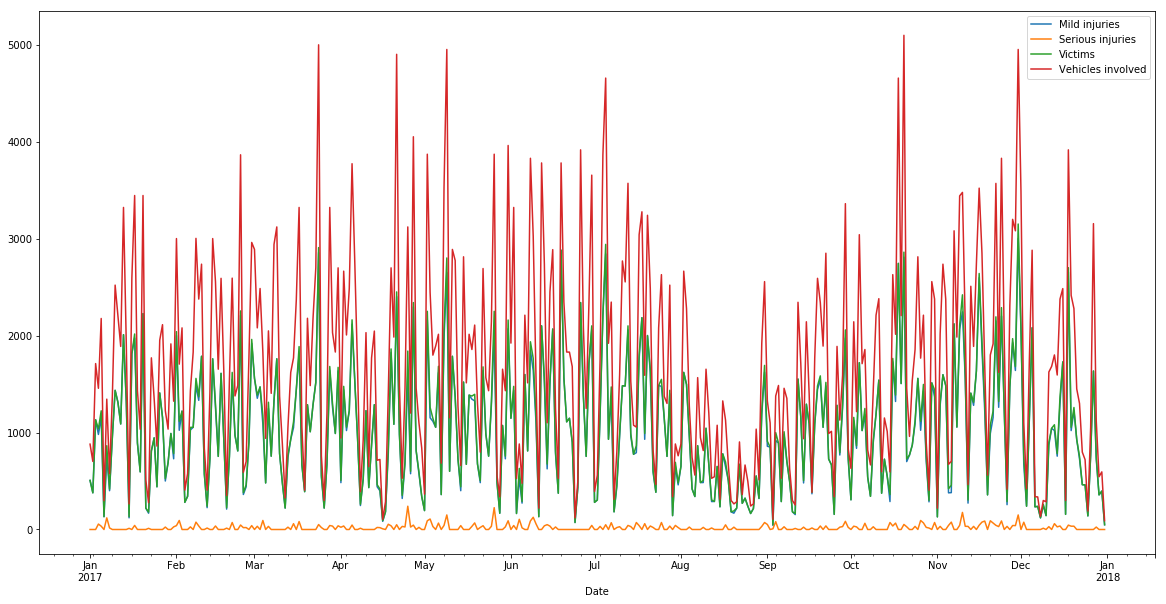

In [56]:
Date['Mild injuries'].plot(legend=True,figsize = (20,10))
Date['Serious injuries'].plot(legend=True,figsize = (20,10))
Date['Victims'].plot(legend=True,figsize = (20,10))
Date['Vehicles involved'].plot(legend=True,figsize = (20,10))

In [70]:
Mildinjuries = Date['Mild injuries']
Seriousinjuries = Date['Serious injuries']
Victims = Date['Victims']
Vehiclesinvolved = Date['Vehicles involved']


trace0 = go.Scatter(x = Mildinjuries.index,
                y= Mildinjuries.values,
                name = "Mild Injuries",
                marker = dict(color='rgb(236,154,41)'),
                opacity = 0.8
               )

trace1 = go.Scatter(x = Date.index,
                y = Seriousinjuries.values,
                name = "Serious Injuries",
                marker = dict(color='rgb(168,32,26)'),
                opacity = 0.8
               )
trace2 = go.Scatter(x = Date.index,
                y = Victims.values,
                name = "Victims",
                marker = dict(color='rgb(23,89,76)'),
                opacity = 0.8
               )
trace3 = go.Scatter(x = Date.index,
                y = Vehiclesinvolved.values,
                name = 'Vehicles Involved',
                marker = dict(color='rgb(56,90,3)'),
                opacity = 0.8)

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(title='Mild Injuries - Serious Injuries - Victims - Vehicles Involved by Date'
                   , xaxis=dict(title='Date'),
                   yaxis=dict(title=''))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, sharing='public')

/Users/Irina/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



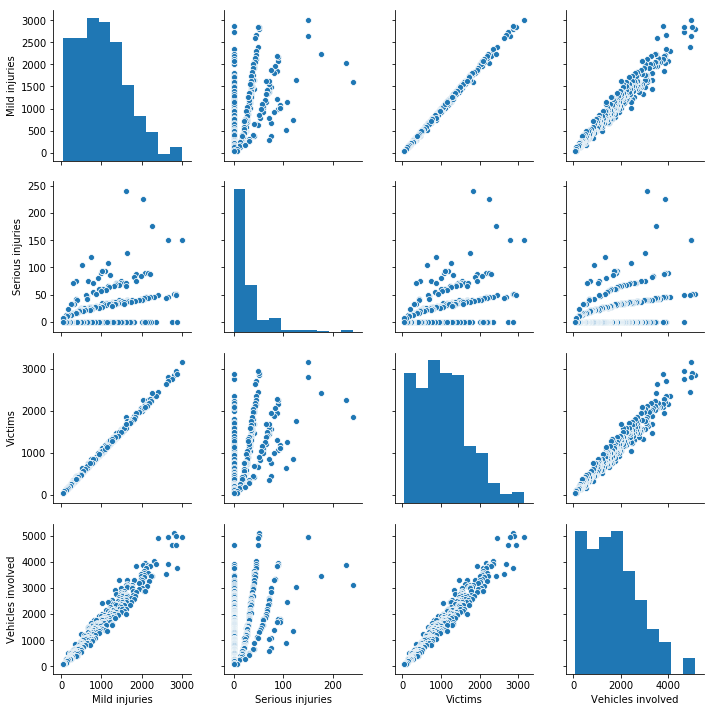

In [237]:
sns.pairplot(Date.dropna())

/Users/Irina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



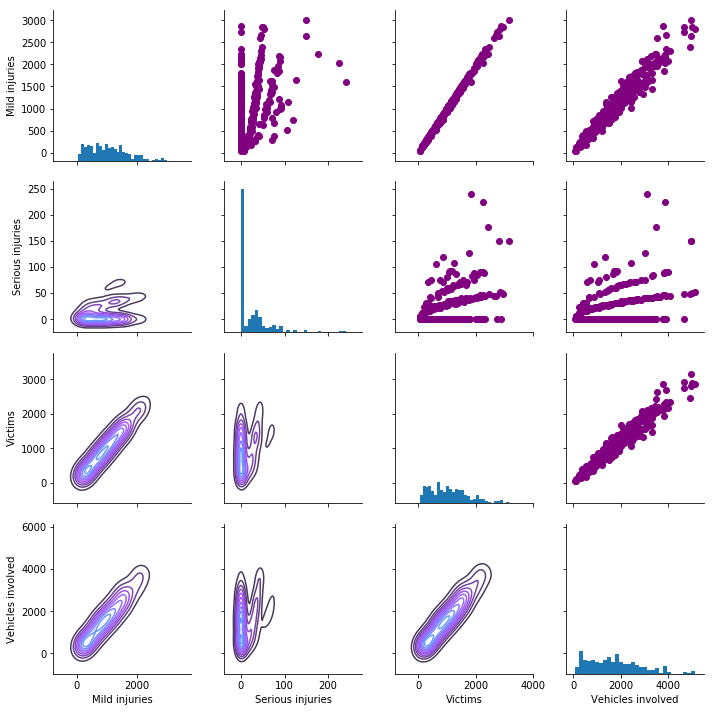

In [238]:
returns_fig = sns.PairGrid(Date.dropna())

returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [115]:
Percent_date.head(10)

Mild injuries  Serious injuries   Victims  Vehicles involved
Date                                                                    
2017-01-01       0.134683          0.000000  0.131918           0.139942
2017-01-02       0.100613          0.000000  0.098547           0.111636
2017-01-03       0.301040          0.000000  0.294859           0.272092
2017-01-04       0.260849          0.749465  0.270092           0.231540
2017-01-05       0.307695          0.455032  0.319105           0.346038
2017-01-06       0.035135          0.000000  0.034413           0.047230
2017-01-07       0.198032          1.605996  0.225250           0.213730
2017-01-08       0.106469          0.214133  0.108454           0.091598
2017-01-09       0.253396          0.000000  0.248193           0.218182
2017-01-10       0.381957          0.000000  0.374114           0.400743

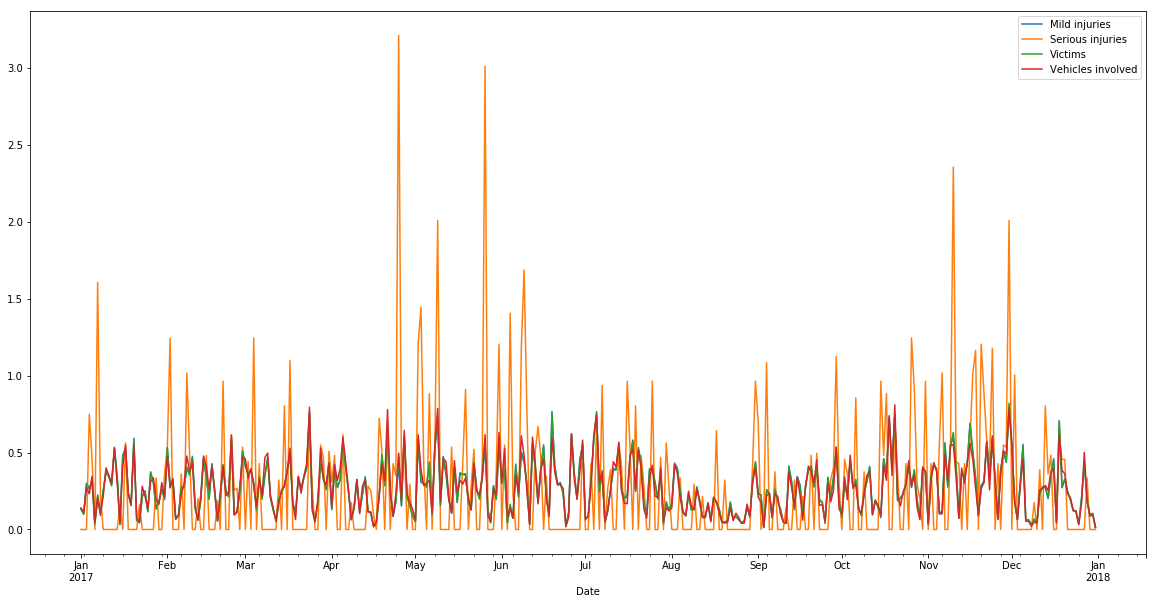

In [116]:
Percent_date['Mild injuries'].plot(legend=True,figsize = (20,10))
Percent_date['Serious injuries'].plot(legend=True,figsize = (20,10))
Percent_date['Victims'].plot(legend=True,figsize = (20,10))
Percent_date['Vehicles involved'].plot(legend=True,figsize = (20,10))

In [119]:
Mildinjuries = Percent_date['Mild injuries']
Seriousinjuries = Percent_date['Serious injuries']
Victims = Percent_date['Victims']
Vehiclesinvolved = Percent_date['Vehicles involved']


trace0 = go.Scatter(x = Mildinjuries.index,
                y= Mildinjuries.values,
                name = "Mild Injuries",
                marker = dict(color='rgb(236,154,41)'),
                opacity = 0.8
               )

trace1 = go.Scatter(x = Date.index,
                y = Seriousinjuries.values,
                name = "Serious Injuries",
                marker = dict(color='rgb(168,32,26)'),
                opacity = 0.8
               )
trace2 = go.Scatter(x = Date.index,
                y = Victims.values,
                name = "Victims",
                marker = dict(color='rgb(23,89,76)'),
                opacity = 0.8
               )
trace3 = go.Scatter(x = Date.index,
                y = Vehiclesinvolved.values,
                name = 'Vehicles Involved',
                marker = dict(color='rgb(56,90,3)'),
                opacity = 0.8)

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(title='Percent : Mild Injuries - Serious Injuries - Victims - Vehicles Involved by Date'
                   , xaxis=dict(title='Date'),
                   yaxis=dict(title=''))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, sharing='public')

/Users/Irina/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [133]:
PartoftheDay

Part of the day    Afternoon  Morning  Night
Mild injuries         188226   149198  38273
Serious injuries        3826     2378   1268
Victims               192146   151779  39648
Vehicles involved     310187   253859  64786

In [60]:
Mildinjuries = PartoftheDay['Mild injuries']
Seriousinjuries = PartoftheDay['Serious injuries']
Victims = PartoftheDay['Victims']
Vehiclesinvolved = PartoftheDay['Vehicles involved']


trace0 = go.Bar(x = Mildinjuries.index,
                y= Mildinjuries.values,
                name = "Mild Injuries",
                marker = dict(color='rgb(236,154,41)'),
                opacity = 0.8
               )

trace1 = go.Bar(x = Seriousinjuries.index,
                y = Seriousinjuries.values,
                name = "Serious Injuries",
                marker = dict(color='rgb(168,32,26)'),
                opacity = 0.8
               )
trace2 = go.Bar(x = Victims.index,
                y = Victims.values,
                name = "Victims",
                marker = dict(color='rgb(23,89,76)'),
                opacity = 0.8
               )
trace3 = go.Bar(x = Vehiclesinvolved.index,
                y = Vehiclesinvolved.values,
                name = 'Vehicles Involved',
                marker = dict(color='rgb(56,90,3)'),
                opacity = 0.8)

data = [trace0,trace1,trace2,trace3]
layout = go.Layout(barmode = 'group',
                   xaxis = dict(tickangle=5),
                   title="",
                      )
fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

In [240]:
Percent_Day

Mild injuries  Serious injuries    Victims  Vehicles involved
Part of the day                                                               
Afternoon            50.100480         51.204497  50.093724          49.327483
Morning              39.712321         31.825482  39.569782          40.369924
Night                10.187199         16.970021  10.336494          10.302593

In [114]:
Mildinjuries = Percent_Day['Mild injuries']
Seriousinjuries = Percent_Day['Serious injuries']
Victims = Percent_Day['Victims']
Vehiclesinvolved = Percent_Day['Vehicles involved']


trace0 = go.Bar(x = Mildinjuries.index,
                y= Mildinjuries.values,
                name = "Mild Injuries",
                marker = dict(color='rgb(236,154,41)'),
                opacity = 0.8
               )

trace1 = go.Bar(x = Seriousinjuries.index,
                y = Seriousinjuries.values,
                name = "Serious Injuries",
                marker = dict(color='rgb(168,32,26)'),
                opacity = 0.8
               )
trace2 = go.Bar(x = Victims.index,
                y = Victims.values,
                name = "Victims",
                marker = dict(color='rgb(23,89,76)'),
                opacity = 0.8
               )
trace3 = go.Bar(x = Vehiclesinvolved.index,
                y = Vehiclesinvolved.values,
                name = 'Vehicles Involved',
                marker = dict(color='rgb(56,90,3)'),
                opacity = 0.8)

data = [trace0,trace1,trace2,trace3]
layout = go.Layout(barmode = 'group',
                   xaxis = dict(tickangle=5),
                   title="Percent : Mild Injuries - Serious Injuries - Victims - Vehicles Involved by Part of the day",
                      )
fig = go.Figure(data=data,layout=layout)

plotly.offline.iplot(fig)

In [89]:
df_a.columns.values
df_a['District Name'].unique()
districts = {}
weekdays = {}
month={}
days = {}
a = 0
for i in df_a['District Name'].unique():
    districts[i] = a
    a = a+1
a = 0
for i in df_a['Weekday'].unique():
    weekdays[i] = a
    a = a+1
a = 0
for i in df_a['Month'].unique():
    month[i] = a
    a = a+1
a = 0
for i in df_a['Part of the day'].unique():
    days[i] = a
    a = a+1
df_a['Weekday'] = df_a['Weekday'].apply(lambda x:weekdays[x])
df_a['District Name'] = df_a['District Name'].apply(lambda x:districts[x]) 
df_a['Month'] = df_a['Month'].apply(lambda x:month[x])
df_a['Part of the day'] = df_a['Part of the day'].apply(lambda x:days[x])
df.head(20)

District Name Neighborhood Name  \
Date                                          
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   
2017-10-13              0           Unknown   

                                                       Street  Weekday  Month  \
Date                                                                            
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   
2017-10-13  Número 27                                     ...        0      0   

            Day  Hour  Part of the day  Mild injuries  Serious injuries  \
Date                                                                      
2017-10-13   13     8                0              2                 0   
2017-10-13   13     8                0              2                 0   
2017-10-13   13     8                0              2                 0   
2017-10-13   13     8                0              2                 0   
2017-10-13   13     8                0              2                 0   
2017-10-13   13     8                0              2                 0   
2017-10-13   13     8                0              2                 0   
2017-10-13   13     8                0              2                 0   
2017-10-13   13     8                0              2                 0   
2017-10-13   13     8                0              2                 0   
2017-10-13   13     8                0              2                 0   
2017-10-13   13     8                0              2                 0   
2017-10-13   13     8                0              2                 0   
2017-10-13   13     8                0              2                

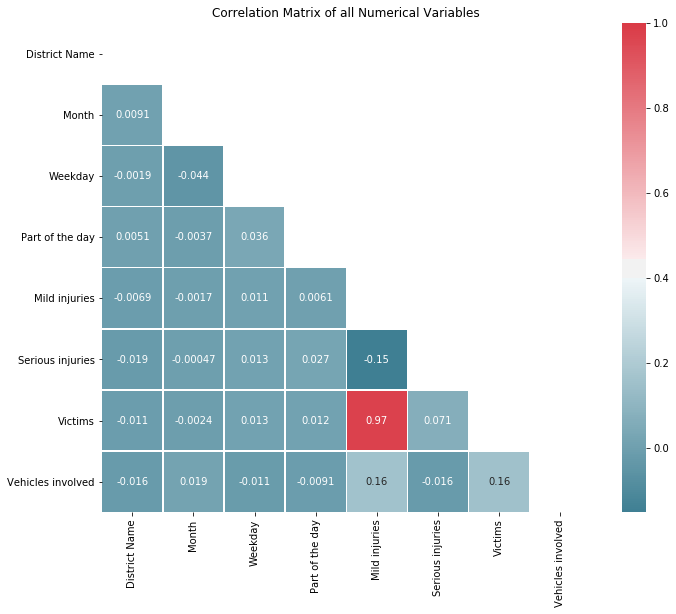

In [91]:
df_a['killed+injured'] = df_a['Mild injuries'] + df_a['Serious injuries'] + df_a['Victims']
temp_df = df_a.groupby(['District Name'])['killed+injured'].sum()
temp_df['Vehicles involved'] = df_a['Vehicles involved']


data= df_a[['District Name','Month','Weekday','Part of the day','Mild injuries','Serious injuries','Victims', 'Vehicles involved']]
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

In [92]:
barcelona_coordinates = [41.406141, 2.168594]
accidents_df = df_a.head(100)
from folium.plugins import HeatMap

map_accidents = folium.Map(location=barcelona_coordinates, tiles='CartoDB Dark_Matter', zoom_start=13)

lat_long_df = accidents_df[['Latitude','Longitude']].as_matrix()

# lat_long = [[row['Latitude'],row['Longitude']] for index,row in lat_long_df.iterrows()]
# from IPython.display import HTML, display
# LDN_COORDINATES = (51.5074, 0.1278) 
# # myMap = folium.Map(location=LDN_COORDINATES, zoom_start=12)
# # myMap._build_map()
# # mapWidth, mapHeight = (400,500) # width and height of the displayed iFrame, in pixels
# # srcdoc = myMap.HTML.replace('"', '&quot;')
# # embed = HTML('<iframe srcdoc="{}" '
# #              'style="width: {}px; height: {}px; display:block; width: 50%; margin: 0 auto; '
# #              'border: none"></iframe>'.format(srcdoc, width, height))
# # embed
# temp_mildInjury = accidents.groupby(['District Name'])['killed+injured'].sum()


map_accidents.add_child(plugins.HeatMap(lat_long_df))

map_accidents

ModuleNotFoundError: No module named 'folium'

In [100]:
barcelona_coordinates = [41.406141, 2.168594]
accidents_df = df_a
from folium.plugins import HeatMap

map_accidents = folium.Map(location=barcelona_coordinates, tiles='CartoDB Dark_Matter', zoom_start=13)

lat_long_df = accidents_df[['Latitude','Longitude']].as_matrix()

map_accidents.add_child(plugins.HeatMap(lat_long_df))

map_accidents

/Users/Irina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

